In [41]:
import config as cfg
import numpy as np
import os
import json
import tweepy
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import pandas as pd

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Tweepy Authentication
auth = tweepy.OAuthHandler(cfg.API_KEY, cfg.API_SECRET)
auth.set_access_token(cfg.ACCESS_TOKEN, cfg.ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser()) 

In [4]:
users = ['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

sources = []
texts = []
dates = []

tweet_df = pd.DataFrame({
    'Source': '',
    'Text': '',
    'Date': '',
    'Sent.Compound': '',
    'Sent.Positive': '',
    'Sent.Neutral': '',
    'Sent.Negative': ''
}, index=[0])
tweet_df = tweet_df[['Source', 'Text', 'Date', 'Sent.Compound', 'Sent.Positive', 'Sent.Neutral', 'Sent.Negative']]

In [5]:
def retrieve_tweets(api, user, file_name, write_row):
    for curr_page in range(5):

        tweets = api.user_timeline(user, page=curr_page)
        for tweet in tweets:
            if user[1:] == users[0]:
                sent_score = analyzer.polarity_scores(tweet['text'])
                tweet_df.loc[write_row, 'Source'] = user
                tweet_df.loc[write_row, 'Text'] = tweet['text']
                tweet_df.loc[write_row, 'Date'] = tweet['created_at'] 
                tweet_df.loc[write_row, 'Sent.Compound'] = sent_score['compound']
                tweet_df.loc[write_row, 'Sent.Positive'] = sent_score['pos']
                tweet_df.loc[write_row, 'Sent.Neutral'] = sent_score['neu']
                tweet_df.loc[write_row, 'Sent.Negative'] = sent_score['neg']
                write_row += 1
            if user[1:] == users[1]:
                sent_score = analyzer.polarity_scores(tweet['text'])
                tweet_df.loc[write_row, 'Source'] = user
                tweet_df.loc[write_row, 'Text'] = tweet['text']
                tweet_df.loc[write_row, 'Date'] = tweet['created_at'] 
                tweet_df.loc[write_row, 'Sent.Compound'] = sent_score['compound']
                tweet_df.loc[write_row, 'Sent.Positive'] = sent_score['pos']
                tweet_df.loc[write_row, 'Sent.Neutral'] = sent_score['neu']
                tweet_df.loc[write_row, 'Sent.Negative'] = sent_score['neg']
                write_row += 1
            if user[1:] == users[2]:
                sent_score = analyzer.polarity_scores(tweet['text'])
                tweet_df.loc[write_row, 'Source'] = user
                tweet_df.loc[write_row, 'Text'] = tweet['text']
                tweet_df.loc[write_row, 'Date'] = tweet['created_at'] 
                tweet_df.loc[write_row, 'Sent.Compound'] = sent_score['compound']
                tweet_df.loc[write_row, 'Sent.Positive'] = sent_score['pos']
                tweet_df.loc[write_row, 'Sent.Neutral'] = sent_score['neu']
                tweet_df.loc[write_row, 'Sent.Negative'] = sent_score['neg']
                write_row += 1
            if user[1:] == users[3]:
                sent_score = analyzer.polarity_scores(tweet['text'])
                tweet_df.loc[write_row, 'Source'] = user
                tweet_df.loc[write_row, 'Text'] = tweet['text']
                tweet_df.loc[write_row, 'Date'] = tweet['created_at'] 
                tweet_df.loc[write_row, 'Sent.Compound'] = sent_score['compound']
                tweet_df.loc[write_row, 'Sent.Positive'] = sent_score['pos']
                tweet_df.loc[write_row, 'Sent.Neutral'] = sent_score['neu']
                tweet_df.loc[write_row, 'Sent.Negative'] = sent_score['neg']
                write_row += 1
            if user[1:] == users[4]:
                sent_score = analyzer.polarity_scores(tweet['text'])
                tweet_df.loc[write_row, 'Source'] = user
                tweet_df.loc[write_row, 'Text'] = tweet['text']
                tweet_df.loc[write_row, 'Date'] = tweet['created_at'] 
                tweet_df.loc[write_row, 'Sent.Compound'] = sent_score['compound']
                tweet_df.loc[write_row, 'Sent.Positive'] = sent_score['pos']
                tweet_df.loc[write_row, 'Sent.Neutral'] = sent_score['neu']
                tweet_df.loc[write_row, 'Sent.Negative'] = sent_score['neg']
                write_row += 1

In [7]:
for user in users:
    write_rows = [0, 100, 200, 300, 400]
    user_name = '@' + user
    retrieve_tweets(api, user_name, user, write_rows[users.index(user)])

In [10]:
tweet_df.to_csv(os.path.join('csv', 'twitter_moods.csv'))

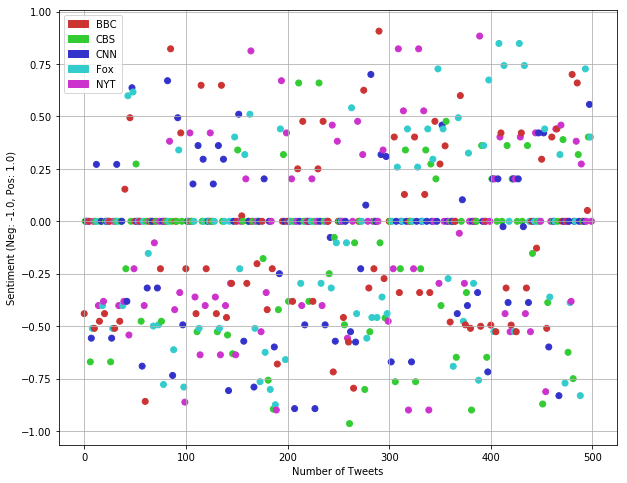

In [56]:
# Plots
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_xlabel('Number of Tweets')
ax1.set_ylabel('Sentiment (Neg: -1.0, Pos: 1.0)')
ax1.grid(True)
colors = [
    (0.8, 0.2, 0.2),
    (0.2, 0.8, 0.2),
    (0.2, 0.2, 0.8),
    (0.2, 0.8, 0.8),
    (0.8, 0.2, 0.8)
]
ax1.scatter(range(len(tweet_df['Sent.Compound'])), tweet_df['Sent.Compound'], color=colors)

bbc = pch.Patch(color=colors[0], label='BBC')
cbs = pch.Patch(color=colors[1], label='CBS')
cnn = pch.Patch(color=colors[2], label='CNN')
fox = pch.Patch(color=colors[3], label='Fox')
nyt = pch.Patch(color=colors[4], label='NYT')
ax1.legend(handles=[bbc, cbs, cnn, fox, nyt])

In [64]:
bbc_df = tweet_df.loc[tweet_df['Source'] == '@BBCWorld']
cbs_df = tweet_df.loc[tweet_df['Source'] == '@CBSNews']
cnn_df = tweet_df.loc[tweet_df['Source'] == '@CNN']
fox_df = tweet_df.loc[tweet_df['Source'] == '@FoxNews']
nyt_df = tweet_df.loc[tweet_df['Source'] == '@nytimes']

bbc_avg = bbc_df['Sent.Compound'].mean()
cbs_avg = cbs_df['Sent.Compound'].mean()
cnn_avg = cnn_df['Sent.Compound'].mean()
fox_avg = fox_df['Sent.Compound'].mean()
nyt_avg = nyt_df['Sent.Compound'].mean()

<Container object of 5 artists>

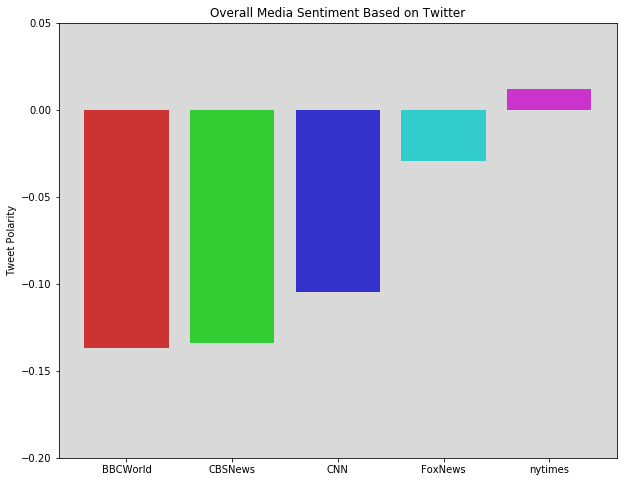

In [96]:
fig, ax2 = plt.subplots(figsize=(10, 8))
plt.title('Overall Media Sentiment Based on Twitter')
ax2.set_ylabel('Tweet Polarity')
ax2.set_ylim(-0.20, 0.05)
ax2.set_facecolor((0.85, 0.85, 0.85))
ax2.bar(users, [bbc_avg, cbs_avg, cnn_avg, fox_avg, nyt_avg], color=colors)